In [8]:
import sys 
sys.path.append('../../')
import_path = '../export/'

In [13]:
import pandas as pd
n_samples = 2000
privacy_dataset = pd.read_csv('../export/seeds_dataset/privacy_scores/report-advantages.csv')
privacy_dataset.head()

,Unnamed: 0,epsilon,shokri_mi_adv,run
0,0,0.05,0.423077,0
1,1,0.05,0.269231,1
2,2,0.05,0.576923,2
3,3,0.05,0.576923,3
4,4,0.05,0.384615,4


In [14]:
import numpy as np


epsilons = pd.unique(privacy_dataset['epsilon'])
epsilons

array([0.05, 0.1 , 0.5 , 1.  , 2.  , 3.  , 5.  , 7.  , 9.  ])

In [15]:
avg_mi = privacy_dataset.groupby('epsilon').mean()['shokri_mi_adv']
avg_std = privacy_dataset.groupby('epsilon').std()['shokri_mi_adv']
avg_std = np.std(avg_std)
avg_std

0.03203037546386801

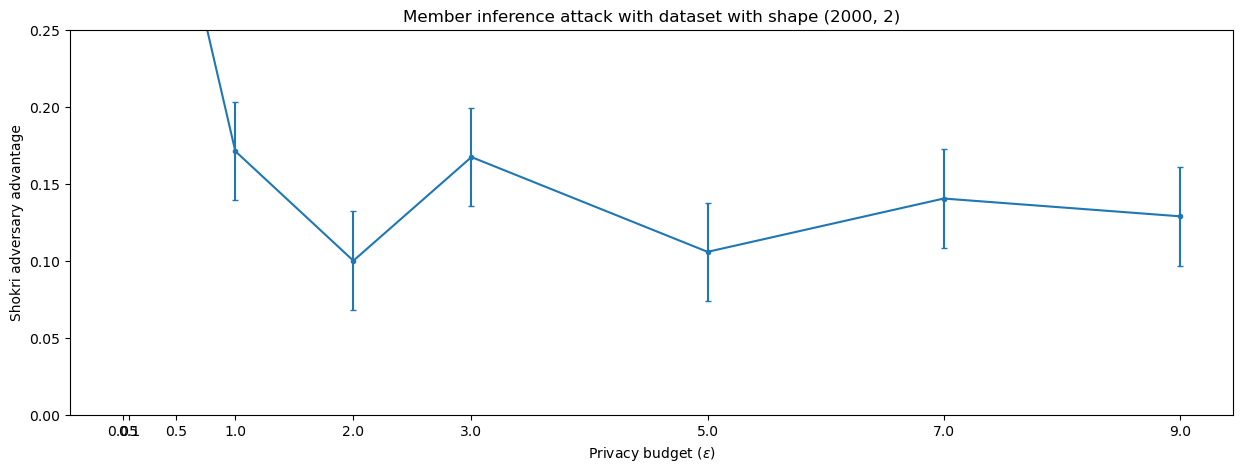

In [18]:
from matplotlib import pyplot as plt


def theoretical_limit(epsilons):
	return [np.exp(eps) - 1 for eps in epsilons]

def pretty_position(X, Y, pos):
	return ((X[pos] + X[pos+1]) / 2, (Y[pos] + Y[pos+1]) / 2)



fig, ax = plt.subplots(figsize=(15, 5))
bottom, top = plt.ylim()
#ax.errorbar(epsilons, theoretical_limit(epsilons), color='black', fmt='--', capsize=2, label='Theoretical Limit')
ax.errorbar(epsilons, avg_mi, yerr=avg_std, fmt='.-', capsize=2)
plt.ylim(bottom, 0.25)
# ax.annotate("$\epsilon$-DP Bound", pretty_position(epsilons, theoretical_limit(epsilons), 4), textcoords="offset points", xytext=(5,0), ha='left')
plt.yticks(np.arange(0, 0.26, step=0.05))
ax.set_title('Member inference attack with dataset with shape ('+str(n_samples)+', 2)')
ax.set_xlabel('Privacy budget ($\epsilon$)')
plt.ylabel('Shokri adversary advantage')
ax.set_xticks(epsilons, labels=epsilons)
plt.show()
fig.savefig('../export/seeds_dataset/privacy_scores/shokri_privacy_adv_' + str(n_samples) +'.png')